In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
crime_df = pd.read_csv("Resources/2022.csv")
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789250,JF351068,01/01/2022 12:00:00 AM,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,12783300,JF343908,01/01/2022 12:00:00 AM,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,12814497,JF380963,01/01/2022 12:00:00 AM,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,12822046,JF389504,01/01/2022 12:00:00 AM,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,12836994,JF403613,01/01/2022 12:00:00 AM,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"


In [3]:
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
crime_df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     621
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            1509
Y Coordinate            1509
Year                       0
Updated On                 0
Latitude                1509
Longitude               1509
Location                1509
dtype: int64

In [5]:
null_columns = crime_df[crime_df.columns[crime_df.isna().any()]]
null_columns

,Location Description,Ward,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,RESIDENCE,6.0,1181612.0,1852489.0,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,STREET,42.0,1177293.0,1905597.0,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,RESIDENCE - GARAGE,37.0,1144610.0,1910885.0,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,APARTMENT,46.0,1170694.0,1926410.0,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,RESIDENCE,28.0,1148076.0,1900155.0,41.881973,-87.731729,"(41.881972634, -87.731728591)"
...,...,...,...,...,...,...,...
220545,TAVERN / LIQUOR STORE,23.0,1150629.0,1865174.0,41.785931,-87.723266,"(41.785930664, -87.723266186)"
220546,APARTMENT,4.0,1182936.0,1875860.0,41.814564,-87.604481,"(41.814563821, -87.604481355)"
220547,STREET,27.0,1151546.0,1905984.0,41.897901,-87.718833,"(41.897900553, -87.718833412)"
220548,STREET,6.0,1168578.0,1856355.0,41.761362,-87.657710,"(41.761361892, -87.657710237)"


In [6]:
print(crime_df['Primary Type'].value_counts()['SEX OFFENSE'])
print(crime_df['Description'].value_counts()['CHILD ABUSE'])

1117
518


In [7]:
crime_df['Description'].value_counts()

SIMPLE                      25564
OVER $500                   18770
$500 AND UNDER              17543
DOMESTIC BATTERY SIMPLE     17505
AUTOMOBILE                  15537
                            ...  
SECOND DEGREE MURDER            1
COMPOUNDING A CRIME             1
CANNABIS PLANT                  1
GAME / AMUSEMENT DEVICE         1
VIOLATION OF SMOKING BAN        1
Name: Description, Length: 278, dtype: int64

In [8]:
crime_df['Case Number'].value_counts()

JF198311    3
JF445443    3
JF356096    3
JF390178    2
JF119102    2
           ..
JF240612    1
JF239717    1
JF247660    1
JF239270    1
JF502215    1
Name: Case Number, Length: 220510, dtype: int64

In [9]:
crime_df['Date'].min()

'01/01/2022 01:00:00 AM'

In [10]:
crime_df.dropna(inplace=True)

In [11]:
crime_df['Date'].dtypes

dtype('O')

In [12]:
crime_df.set_index('Date', inplace = True)
crime_df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2022 12:00:00 AM,12789250,JF351068,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,624,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
01/01/2022 12:00:00 AM,12783300,JF343908,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,1833,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
01/01/2022 12:00:00 AM,12814497,JF380963,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,2533,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
01/01/2022 12:00:00 AM,12822046,JF389504,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1925,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
01/01/2022 12:00:00 AM,12836994,JF403613,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,1114,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/07/2022 11:50:00 PM,12915874,JF502169,040XX W 59TH ST,0860,THEFT,RETAIL THEFT,TAVERN / LIQUOR STORE,False,False,813,...,23.0,65,06,1150629.0,1865174.0,2022,12/14/2022 03:49:33 PM,41.785931,-87.723266,"(41.785930664, -87.723266186)"
12/07/2022 11:51:00 PM,12915875,JF502171,044XX S DREXEL BLVD,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,221,...,4.0,39,04B,1182936.0,1875860.0,2022,12/14/2022 03:49:33 PM,41.814564,-87.604481,"(41.814563821, -87.604481355)"
12/07/2022 11:52:00 PM,12917956,JF502185,009XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1112,...,27.0,23,08B,1151546.0,1905984.0,2022,12/14/2022 03:49:33 PM,41.897901,-87.718833,"(41.897900553, -87.718833412)"


C:\Users\amudd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


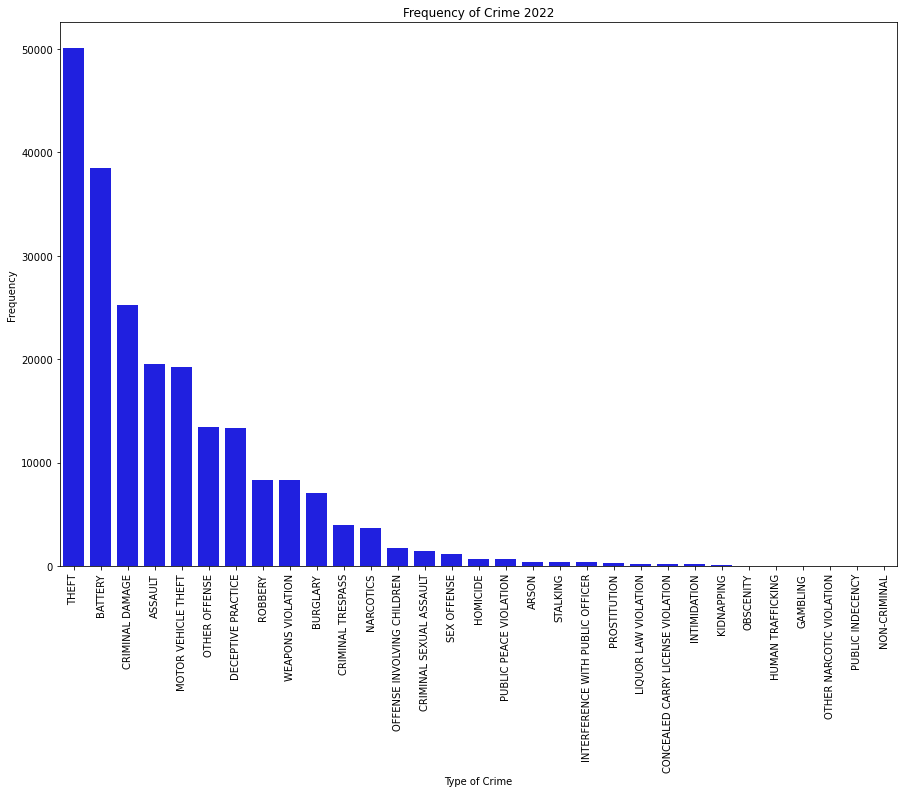

In [13]:
crime_count = crime_df["Primary Type"].value_counts()
# Add labels to the plot
figure = plt.figure(figsize=(15,10))

sns.barplot(crime_count.index, crime_count.values, color='b', ax = figure.gca())

plt.title('Frequency of Crime 2022')
plt.xlabel('Type of Crime')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

plt.show()

In [14]:
loc_crime = crime_df['Location Description'].value_counts()
loc_crime

STREET                                    62633
APARTMENT                                 41732
RESIDENCE                                 27689
SIDEWALK                                  11338
PARKING LOT / GARAGE (NON RESIDENTIAL)     8569
                                          ...  
STAIRWELL                                     1
BANQUET HALL                                  1
BARBER SHOP/BEAUTY SALON                      1
TRUCK                                         1
AIRPORT/AIRCRAFT                              1
Name: Location Description, Length: 132, dtype: int64

C:\Users\amudd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


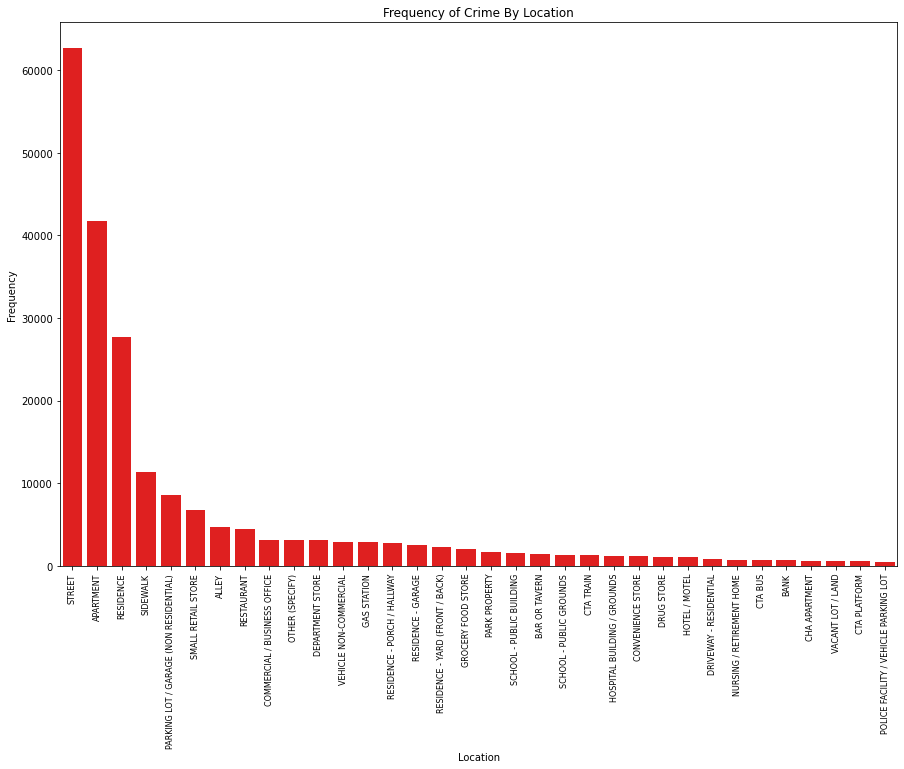

In [15]:
#Graph of crimes in locations with 500+ instances
rel_location_count = loc_crime[loc_crime>500]

figure = plt.figure(figsize=(15,10))

#Plot resulting data using Seaborn
sns.barplot(rel_location_count.index, rel_location_count.values, color = 'r')

plt.title('Frequency of Crime By Location')
plt.xlabel('Location')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Frequency')

plt.show()

In [16]:
street_crimes = crime_df[crime_df['Location Description'].str.contains('STREET')]
street_crimes

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2022 12:00:00 AM,12783300,JF343908,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,1833,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
01/01/2022 12:00:00 AM,12582456,JF100747,073XX S LANGLEY AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,323,...,6.0,69,14,1182162.0,1856593.0,2022,11/12/2022 03:46:21 PM,41.761711,-87.607917,"(41.761711431, -87.607916742)"
01/01/2022 12:00:00 AM,12583059,JF101544,020XX N KARLOV AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,2525,...,26.0,20,06,1148721.0,1913242.0,2022,10/11/2022 04:45:59 PM,41.917872,-87.729022,"(41.917872284, -87.729021632)"
01/01/2022 12:00:00 AM,12584013,JF102665,066XX S LOWE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,723,...,6.0,68,07,1173179.0,1860959.0,2022,10/11/2022 04:45:59 PM,41.773895,-87.640711,"(41.773895414, -87.640711342)"
01/01/2022 12:00:00 AM,12583708,JF102406,017XX N KEATING AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2533,...,37.0,25,14,1144460.0,1911066.0,2022,11/12/2022 03:46:21 PM,41.911982,-87.744732,"(41.911982438, -87.744731777)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/07/2022 11:40:00 PM,12915906,JF502203,002XX W 24TH ST,031A,ROBBERY,ARMED - HANDGUN,STREET,False,False,914,...,25.0,34,03,1175114.0,1888397.0,2022,12/14/2022 03:49:33 PM,41.849145,-87.632798,"(41.849144867, -87.632798144)"
12/07/2022 11:40:00 PM,12915866,JF502241,079XX S ASHLAND AVE,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,STREET,True,False,611,...,21.0,71,10,1167051.0,1852166.0,2022,12/14/2022 03:49:33 PM,41.749899,-87.663426,"(41.749899475, -87.663426378)"
12/07/2022 11:45:00 PM,12916907,JF502921,118XX S WALLACE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,524,...,34.0,53,07,1174435.0,1826477.0,2022,12/14/2022 03:49:33 PM,41.679244,-87.637129,"(41.679244262, -87.637129451)"


In [17]:
street_crimes.index.dtype

dtype('O')

In [18]:
street_crimes['Primary Type'].value_counts()

THEFT                                14560
MOTOR VEHICLE THEFT                  14515
CRIMINAL DAMAGE                       9479
BATTERY                               5672
WEAPONS VIOLATION                     4603
ASSAULT                               3961
ROBBERY                               3121
OTHER OFFENSE                         2515
NARCOTICS                             1681
DECEPTIVE PRACTICE                     639
HOMICIDE                               376
CRIMINAL TRESPASS                      361
PROSTITUTION                           239
INTERFERENCE WITH PUBLIC OFFICER       220
PUBLIC PEACE VIOLATION                 159
ARSON                                   94
OFFENSE INVOLVING CHILDREN              87
CRIMINAL SEXUAL ASSAULT                 66
BURGLARY                                62
STALKING                                62
SEX OFFENSE                             61
CONCEALED CARRY LICENSE VIOLATION       54
KIDNAPPING                              31
INTIMIDATIO

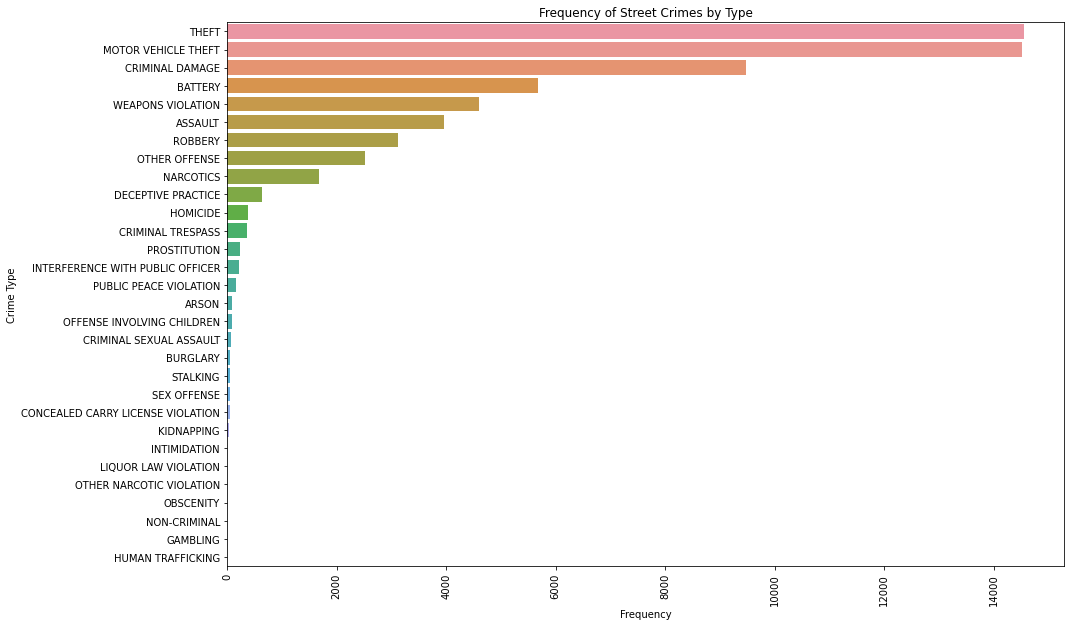

In [19]:
figure = plt.figure(figsize=(15,10))

# Create a countplot of the Primary Type column
sns.countplot(y='Primary Type', data=street_crimes, order=street_crimes['Primary Type'].value_counts().index)

# Set the title and axis labels
plt.title('Frequency of Street Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')

# Rotate the y-axis labels to improve readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

C:\Users\amudd\AppData\Local\Temp\ipykernel_13768\1521367421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_crimes['Hour'] = street_crimes.index.hour


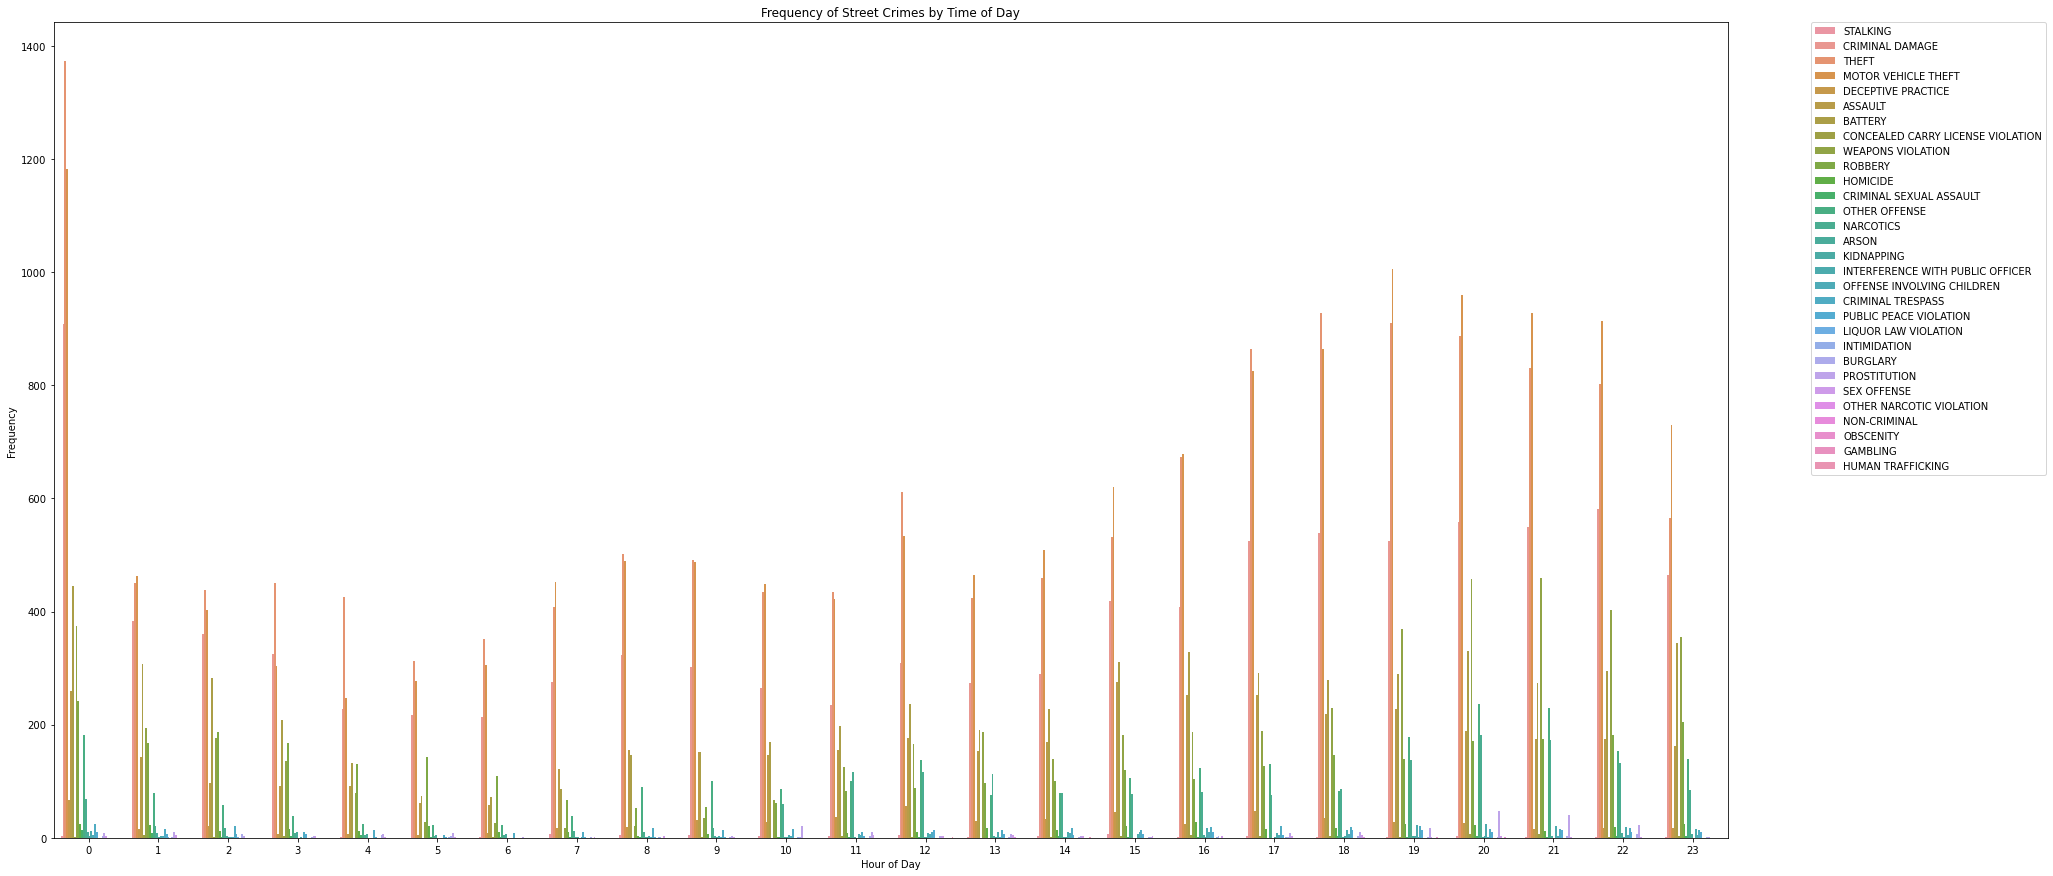

In [20]:
figure = plt.figure(figsize=(30,15))

# Extract the hour component from the Date column
street_crimes.index = pd.to_datetime(street_crimes.index)
street_crimes['Hour'] = street_crimes.index.hour

# Create a countplot of the Hour column
sns.countplot(x='Hour', hue = 'Primary Type', data=street_crimes)

# Set the title and axis labels
plt.title('Frequency of Street Crimes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

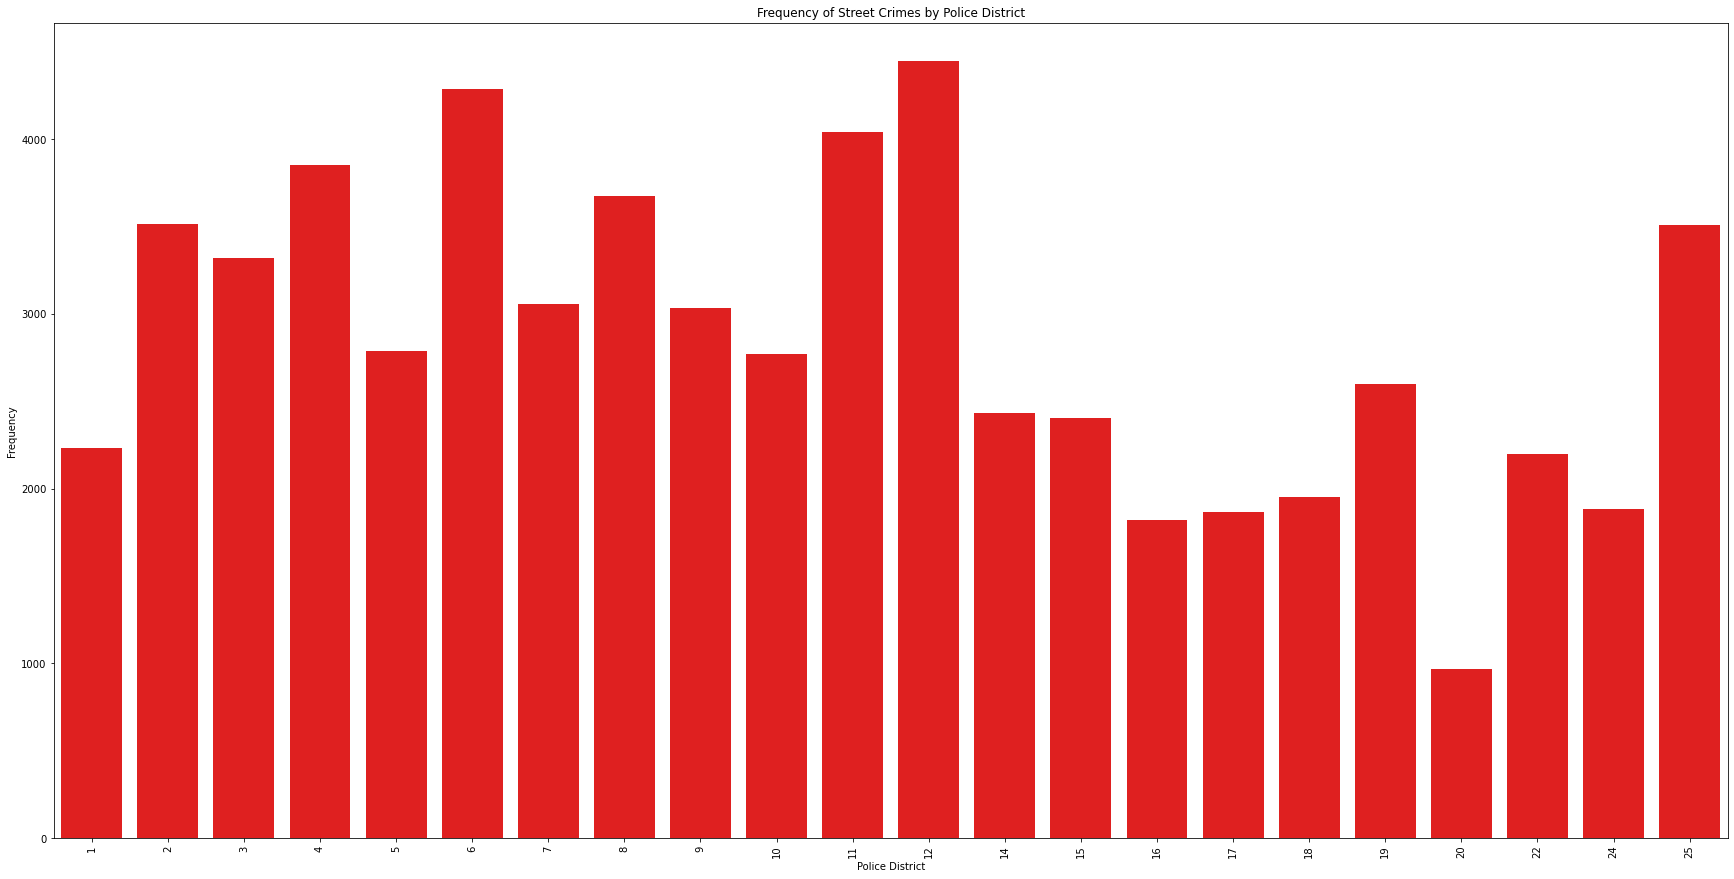

In [21]:
figure = plt.figure(figsize=(30,15))

# Group the data by police district
district_counts = street_crimes.groupby('District').size().sort_values(ascending=False)

# Create a barplot of the District counts
sns.barplot(x=district_counts.index, y=district_counts.values, color='r')

# Set the title and axis labels
plt.title('Frequency of Street Crimes by Police District')
plt.xlabel('Police District')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [22]:
district_counts

District
12    4444
6     4289
11    4041
4     3852
8     3675
2     3512
25    3507
3     3320
7     3056
9     3036
5     2788
10    2771
19    2599
14    2434
15    2404
1     2231
22    2195
18    1949
24    1881
17    1864
16    1819
20     966
dtype: int64

In [23]:
# Create a new column with time periods
def get_time_period(hour):
    if hour >= 5 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    else:
        return 'Night'

street_crimes['Time Period'] = street_crimes['Hour'].apply(get_time_period)
street_crimes.head()                        

C:\Users\amudd\AppData\Local\Temp\ipykernel_13768\732735931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_crimes['Time Period'] = street_crimes['Hour'].apply(get_time_period)


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour,Time Period
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12783300,JF343908,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,1833,...,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)",0,Night
2022-01-01,12582456,JF100747,073XX S LANGLEY AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,323,...,14,1182162.0,1856593.0,2022,11/12/2022 03:46:21 PM,41.761711,-87.607917,"(41.761711431, -87.607916742)",0,Night
2022-01-01,12583059,JF101544,020XX N KARLOV AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,2525,...,06,1148721.0,1913242.0,2022,10/11/2022 04:45:59 PM,41.917872,-87.729022,"(41.917872284, -87.729021632)",0,Night
2022-01-01,12584013,JF102665,066XX S LOWE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,723,...,07,1173179.0,1860959.0,2022,10/11/2022 04:45:59 PM,41.773895,-87.640711,"(41.773895414, -87.640711342)",0,Night
2022-01-01,12583708,JF102406,017XX N KEATING AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2533,...,14,1144460.0,1911066.0,2022,11/12/2022 03:46:21 PM,41.911982,-87.744732,"(41.911982438, -87.744731777)",0,Night


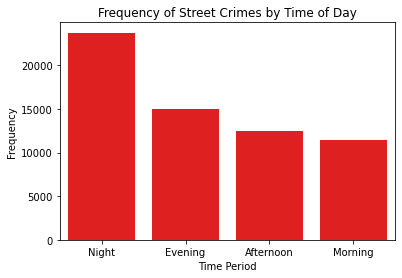

In [24]:
# Compute the frequency of street crimes by time period
time_period_counts = street_crimes['Time Period'].value_counts()

# Create a barplot of the time period counts
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, color='r')

# Set the title and axis labels
plt.title('Frequency of Street Crimes by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Frequency')

# Display the plot
plt.show()

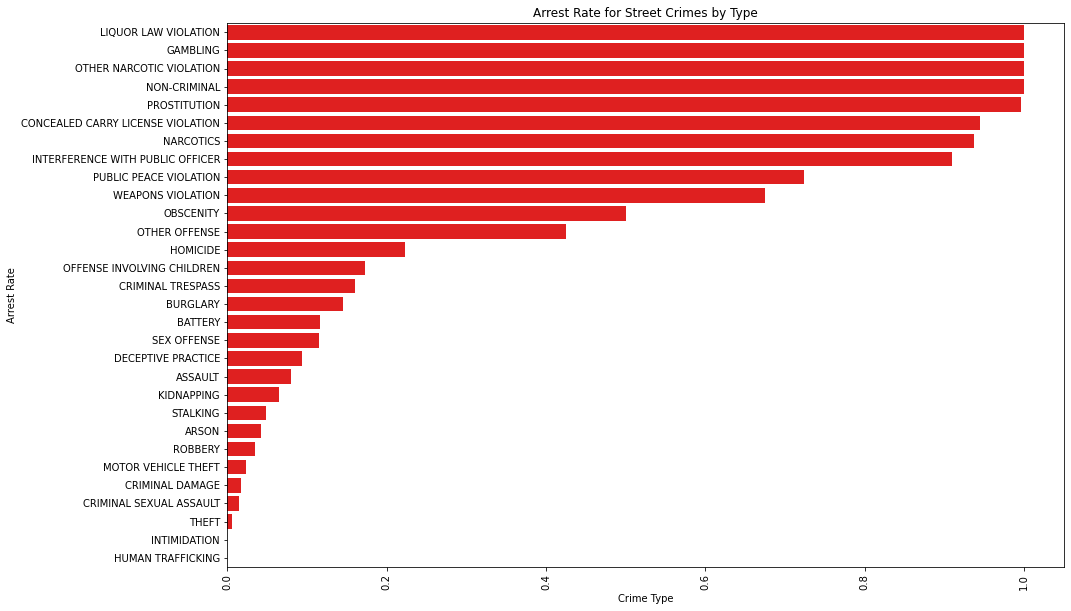

In [29]:
figure = plt.figure(figsize=(15,10))
# Group the data by primary type and compute the arrest rate
streetarrest_rates = street_crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

# Create a barplot of the arrest rates
sns.barplot(x=streetarrest_rates.values, y=streetarrest_rates.index, color='r')

# Set the title and axis labels
plt.title('Arrest Rate for Street Crimes by Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [26]:
apartment_crimes  = crime_df[crime_df['Location Description'].str.contains('APARTMENT')]
apartment_crimes

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2022 12:00:00 AM,12822046,JF389504,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1925,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
01/01/2022 12:00:00 AM,12840187,JF411409,046XX N SHERIDAN RD,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,1914,...,46.0,3,06,1168782.0,1931175.0,2022,11/12/2022 03:46:21 PM,41.966670,-87.654795,"(41.966669657, -87.654795172)"
01/01/2022 12:00:00 AM,12849613,JF422946,023XX W DEVON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2413,...,50.0,2,11,1159359.0,1942426.0,2022,11/12/2022 03:46:21 PM,41.997742,-87.689131,"(41.997742435, -87.689130952)"
01/01/2022 12:00:00 AM,12584964,JF103834,070XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,733,...,6.0,68,14,1171190.0,1858171.0,2022,10/11/2022 04:45:59 PM,41.766289,-87.648084,"(41.766288528, -87.648084026)"
01/01/2022 12:00:00 AM,12582215,JF100535,030XX W JACKSON BLVD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1124,...,28.0,27,14,1155939.0,1898528.0,2022,11/12/2022 03:46:21 PM,41.877353,-87.702899,"(41.877353099, -87.702899477)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/07/2022 11:00:00 PM,12915873,JF502181,067XX S EAST END AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,...,5.0,43,14,1188698.0,1860534.0,2022,12/14/2022 03:49:33 PM,41.772372,-87.583836,"(41.772372122, -87.5838361)"
12/07/2022 11:06:00 PM,12916263,JF502687,113XX S FRONT AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,APARTMENT,False,False,531,...,9.0,49,11,1181308.0,1829802.0,2022,12/14/2022 03:49:33 PM,41.688213,-87.611870,"(41.688213381, -87.611869654)"
12/07/2022 11:06:00 PM,12915867,JF502163,004XX E 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,624,...,6.0,69,14,1180749.0,1852732.0,2022,12/14/2022 03:49:33 PM,41.751149,-87.613214,"(41.751149013, -87.613213936)"


In [34]:
apartment_crimes['Primary Type'].value_counts()

BATTERY                              12528
THEFT                                 6066
CRIMINAL DAMAGE                       4753
ASSAULT                               4664
OTHER OFFENSE                         4556
DECEPTIVE PRACTICE                    3684
BURGLARY                              2645
CRIMINAL TRESPASS                      846
OFFENSE INVOLVING CHILDREN             625
CRIMINAL SEXUAL ASSAULT                499
MOTOR VEHICLE THEFT                    281
SEX OFFENSE                            277
ROBBERY                                234
WEAPONS VIOLATION                      187
STALKING                               140
PUBLIC PEACE VIOLATION                  79
NARCOTICS                               57
HOMICIDE                                56
ARSON                                   52
INTIMIDATION                            51
KIDNAPPING                              21
OBSCENITY                               14
INTERFERENCE WITH PUBLIC OFFICER         7
HUMAN TRAFF

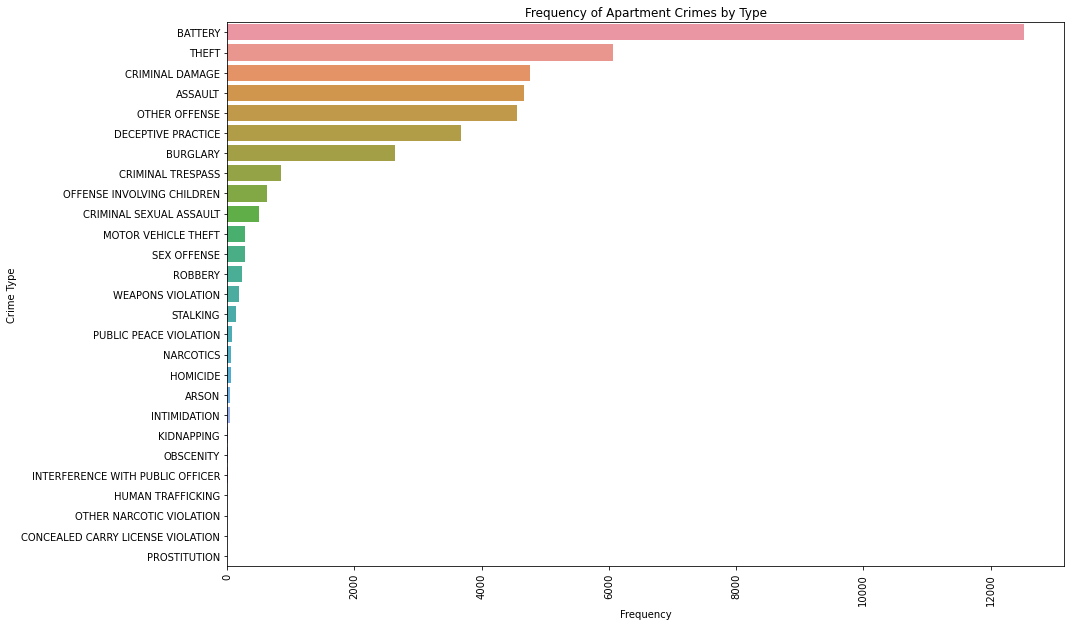

In [36]:
figure = plt.figure(figsize=(15,10))

# Create a countplot of the Primary Type column
sns.countplot(y='Primary Type', data=apartment_crimes, order=apartment_crimes['Primary Type'].value_counts().index)

# Set the title and axis labels
plt.title('Frequency of Apartment Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')

# Rotate the y-axis labels to improve readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

C:\Users\amudd\AppData\Local\Temp\ipykernel_13768\3251254403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_crimes['Hour'] = apartment_crimes.index.hour


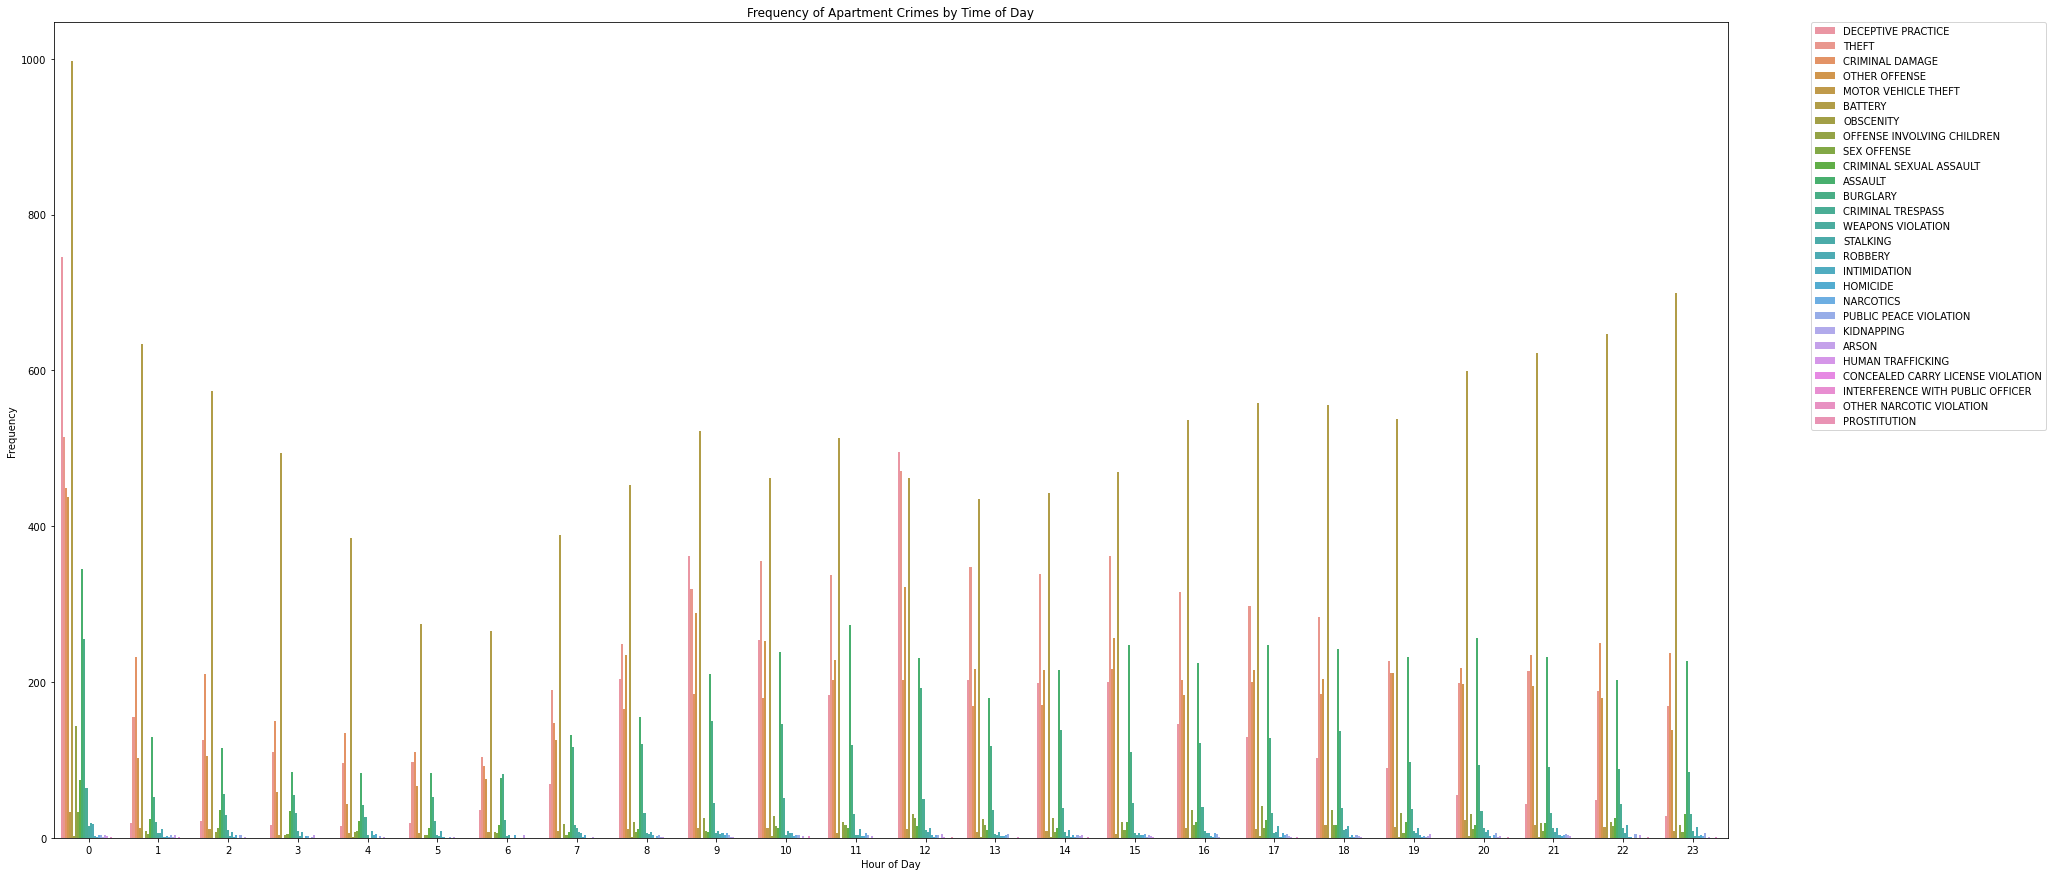

In [39]:
figure = plt.figure(figsize=(30,15))

# Extract the hour component from the Date column
apartment_crimes.index = pd.to_datetime(apartment_crimes.index)
apartment_crimes['Hour'] = apartment_crimes.index.hour

# Create a countplot of the Hour column
sns.countplot(x='Hour', hue = 'Primary Type', data=apartment_crimes)

# Set the title and axis labels
plt.title('Frequency of Apartment Crimes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

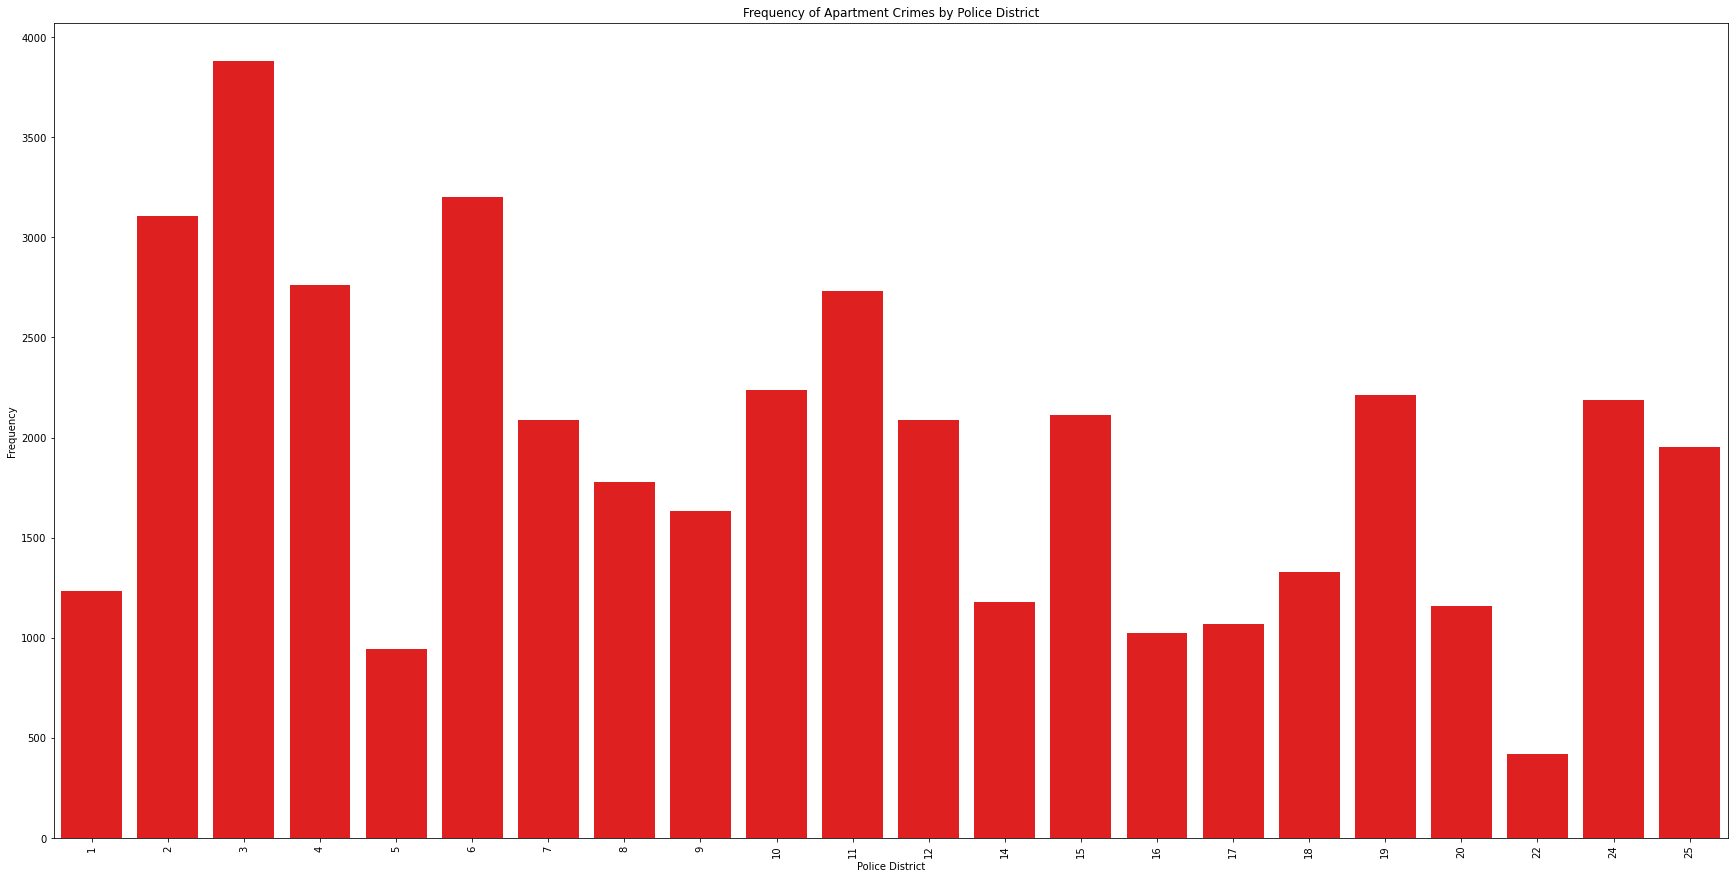

In [40]:
figure = plt.figure(figsize=(30,15))

# Group the data by police district
district_counts = apartment_crimes.groupby('District').size().sort_values(ascending=False)

# Create a barplot of the District counts
sns.barplot(x=district_counts.index, y=district_counts.values, color='r')

# Set the title and axis labels
plt.title('Frequency of Apartment Crimes by Police District')
plt.xlabel('Police District')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [41]:
apartment_crimes['Time Period'] = apartment_crimes['Hour'].apply(get_time_period)
apartment_crimes.head()

C:\Users\amudd\AppData\Local\Temp\ipykernel_13768\4003261999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_crimes['Time Period'] = apartment_crimes['Hour'].apply(get_time_period)


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour,Time Period
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12822046,JF389504,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1925,...,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)",0,Night
2022-01-01,12840187,JF411409,046XX N SHERIDAN RD,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,1914,...,06,1168782.0,1931175.0,2022,11/12/2022 03:46:21 PM,41.966670,-87.654795,"(41.966669657, -87.654795172)",0,Night
2022-01-01,12849613,JF422946,023XX W DEVON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2413,...,11,1159359.0,1942426.0,2022,11/12/2022 03:46:21 PM,41.997742,-87.689131,"(41.997742435, -87.689130952)",0,Night
2022-01-01,12584964,JF103834,070XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,733,...,14,1171190.0,1858171.0,2022,10/11/2022 04:45:59 PM,41.766289,-87.648084,"(41.766288528, -87.648084026)",0,Night
2022-01-01,12582215,JF100535,030XX W JACKSON BLVD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1124,...,14,1155939.0,1898528.0,2022,11/12/2022 03:46:21 PM,41.877353,-87.702899,"(41.877353099, -87.702899477)",0,Night


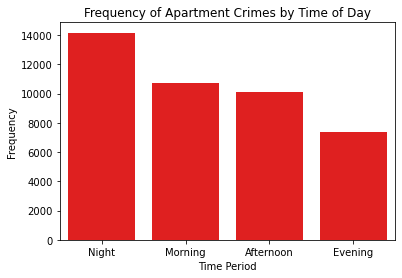

In [42]:
# Compute the frequency of street crimes by time period
time_period_counts = apartment_crimes['Time Period'].value_counts()

# Create a barplot of the time period counts
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, color='r')

# Set the title and axis labels
plt.title('Frequency of Apartment Crimes by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Frequency')

# Display the plot
plt.show()

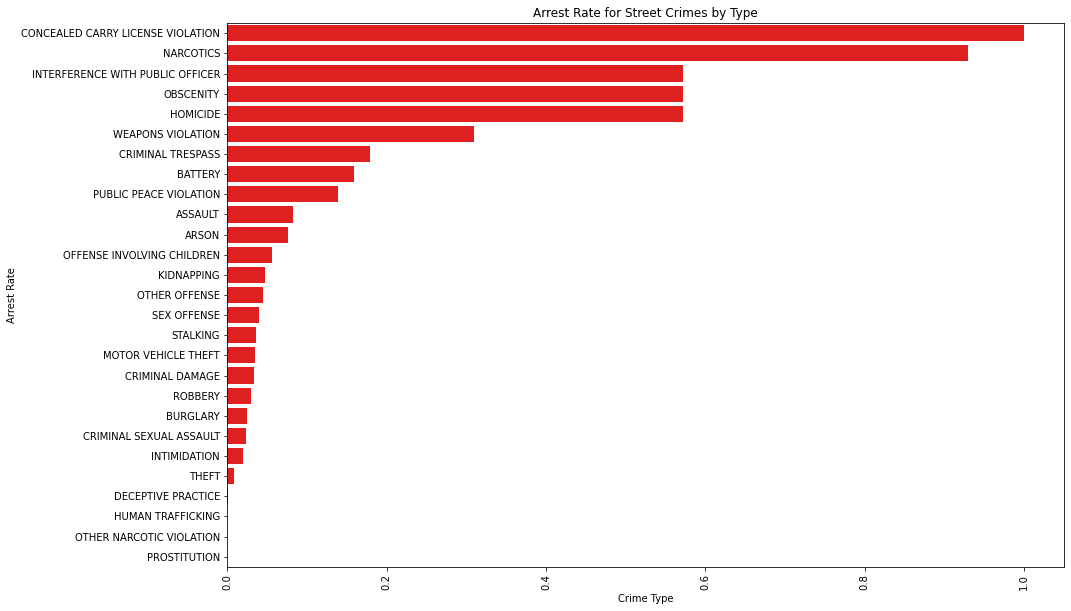

In [44]:
figure = plt.figure(figsize=(15,10))
# Group the data by primary type and compute the arrest rate
apartmentarrest_rates = apartment_crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

# Create a barplot of the arrest rates
sns.barplot(x=apartmentarrest_rates.values, y=apartmentarrest_rates.index, color='r')

# Set the title and axis labels
plt.title('Arrest Rate for Street Crimes by Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()